## This Python script leverages various libraries, including pandas, matplotlib, yfinance, and plotly, to conduct financial data analysis and visualization. It utilizes the Yahoo Finance API to retrieve market capitalization (market_cap), financial data (financials), and technical indicators (technical) for in-depth analysis of a given stock.

* Market Cap: Market capitalization represents a company's total market value, calculated by multiplying its stock price by the number of outstanding shares.

* Financials: Utilizing data visualization, I transform complex financial statements into insightful visual snapshots, revealing revenue trends, expense patterns, and profitability for informed decision-making in data analytics.

* Technical Indicators: Utilizing historical stock data, technical indicators like RSI, MACD, and Bollinger Bands help assess trends, momentum, and potential buy/sell signals, aiding traders and investors in decision-making.

>* MACD (Moving Average Convergence Divergence): MACD is a trend-following momentum indicator that shows the relationship between two moving averages of an asset's price. It helps identify trend direction, momentum strength, and potential buy or sell signals.

>* Bollinger Bands: Bollinger Bands are volatility indicators using a set of trendlines plotted two standard deviations away from a simple moving average. They reveal overbought or oversold conditions, aiding in potential reversal or continuation signals.

>* RSI (Relative Strength Index): RSI measures the speed and change of price movements. It oscillates between 0 and 100, identifying overbought or oversold conditions. RSI is used to confirm trends, spot potential reversals, and generate buy or sell signals.

In [ ]:
!pip install yfinance yahoo_fin


In [ ]:
# uses Python libraries (pandas, matplotlib, talib, yfinance, plotly) for financial data analysis and data visualization.
# uses Yahoo Finance API to fetch market cap, financials, and technical indicators

In [16]:
# Import necessary libraries for financial data analysis and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go


In [194]:
#top stock market code
stock_market_code = pd.read_csv("https://raw.githubusercontent.com/yashsahu27420/dataset/main/top%2010%20us%20stock%20with%20stock%20code.csv")
stock_market_code

,Rank,Company Name,Stock Symbol,Market Cap (USD Billion)
0,1,Apple Inc.,AAPL,2.75
1,2,Microsoft Corporation,MSFT,2.42
2,3,Amazon.com Inc.,AMZN,1.02
3,4,Alphabet Inc.,GOOGL,1.01
4,5,Berkshire Hathaway Inc.,BRK.A,706.00
5,6,Meta Platforms Inc.,META,425.00
6,7,UnitedHealth Group Incorporated,UNH,418.00
7,8,NVIDIA Corporation,NVDA,393.00
8,9,Tesla Inc.,TSLA,383.00
9,10,Johnson & Johnson,JNJ,372.00


In [195]:
# uses Yahoo Finance API to fetch market cap, financials, and technical indicators
# Function to get market cap
def get_market_cap(stock_symbol):
    stock_info = yf.Ticker(stock_symbol)
    market_cap = stock_info.info.get('marketCap', 'N/A')
    return market_cap

# Function to get financials
def get_financials(stock_symbol):
    financials = yf.Ticker(stock_symbol).quarterly_financials
    return financials

# Function to get technical indicators
def get_technical_indicators(stock_symbol):
    technical_indicators = yf.Ticker(stock_symbol).history(period='1y')
    return technical_indicators


if __name__ == "__main__":
    stock_symbol = input("Stock Symbol: ").strip()

    # Market Cap data
    market_cap = get_market_cap(stock_symbol)
    print(f"\n Market capitalisation of {stock_symbol}: {market_cap} USD")

    # Financials data
    financials = get_financials(stock_symbol)

    print(f"\nFinancials for {stock_symbol}:\n{financials.to_markdown()}")
    financials = financials

    # Technical Indicators data
    technical_indicators = get_technical_indicators(stock_symbol)
    technical_indicators.reset_index(inplace=True)   # technical_indicators.reset_index(inplace=True)
    print(f"\nTechnical Indicators for {stock_symbol}:\n{technical_indicators.head(10).to_markdown()}")


Stock Symbol: JNJ	

 Market capitalisation of JNJ: 373513584640 USD

Financials for JNJ:
|                                                            |   2023-09-30 00:00:00 |   2023-06-30 00:00:00 |   2023-03-31 00:00:00 |   2022-12-31 00:00:00 |   2022-09-30 00:00:00 |
|:-----------------------------------------------------------|----------------------:|----------------------:|----------------------:|----------------------:|----------------------:|
| Tax Effect Of Unusual Items                                |          -6.3336e+07  |          -2.1315e+07  |           -2.73e+07   |          -1.3608e+07  |          -1.9188e+07  |
| Tax Rate For Calcs                                         |           0.174       |           0.147       |            0.21       |           0.162       |           0.234       |
| Normalized EBITDA                                          |           6.262e+09   |           6.668e+09   |            6.731e+09  |           5.499e+09   |           6.38e+09  

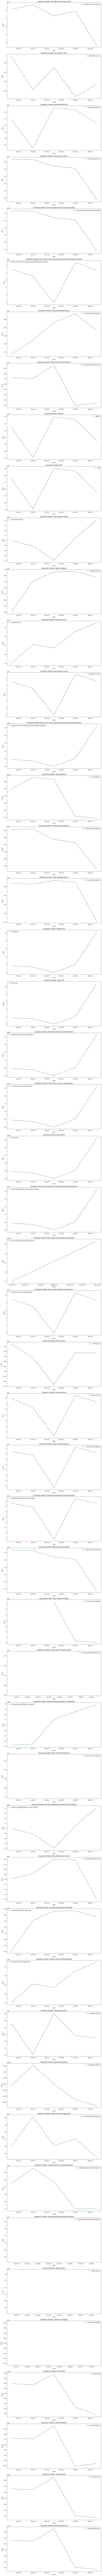

In [196]:
# Transpose the DataFrame for easier plotting
df_transposed = financials.transpose()

# Plot the Quarterly Growth for each category in separate subplots
fig, axes = plt.subplots(nrows=len(df_transposed.columns), figsize=(12, 6 * len(df_transposed.columns)))

for i, column in enumerate(df_transposed.columns):
    axes[i].plot(df_transposed.index, df_transposed[column], label=column)
    axes[i].set_title(f'Quarterly Growth: {column}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


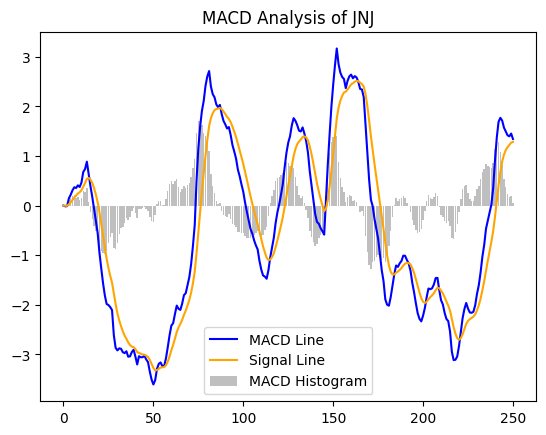

In [197]:
#Moving Average Convergence Divergence (MACD):
# Calculate MACD

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term Exponential Moving Averages (EMAs)
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    macd = short_ema - long_ema

    # Calculate Signal line (EMA of MACD)
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()

    # Calculate MACD Histogram
    macd_histogram = macd - signal_line

    close_prices = technical_indicators['Close']

    return macd, signal_line, macd_histogram
macd, signal_line, macd_histogram = calculate_macd(technical_indicators)
# Plotting MACD
plt.subplot(1, 1, 1)
plt.plot(technical_indicators.index, macd, label='MACD Line', color='blue')
plt.plot(technical_indicators.index, signal_line, label='Signal Line', color='orange')
plt.bar(technical_indicators.index, macd_histogram, label='MACD Histogram', color='gray', alpha=0.5)
plt.title(f'MACD Analysis of {stock_symbol}')
plt.legend()

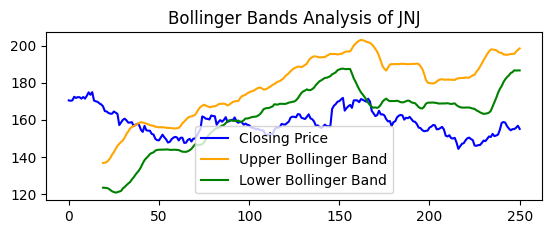

In [198]:
#Bollinger Bands:
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    # Calculate rolling mean and standard deviation
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    # Calculate upper and lower Bollinger Bands
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)

    return upper_band, lower_band


# Plotting Bollinger Bands
plt.subplot(2, 1, 2)
plt.plot(technical_indicators.index, technical_indicators['Close'], label='Closing Price', color='blue')
plt.plot(technical_indicators.index, upper_band, label='Upper Bollinger Band', color='orange')
plt.plot(technical_indicators.index, lower_band, label='Lower Bollinger Band', color='green')
plt.title(f'Bollinger Bands Analysis of {stock_symbol}')
plt.legend()

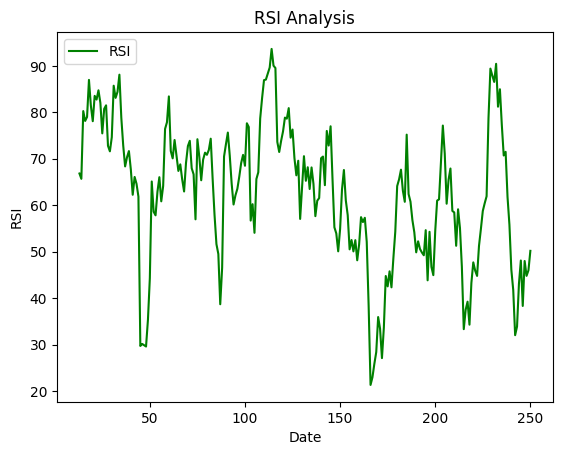

<Figure size 640x480 with 0 Axes>

In [199]:
#Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    # Calculate daily price changes
    delta = data.diff(1)

    # Calculate gains and losses
    gains = np.where(delta > 0, delta, 0)
    losses = np.where(delta < 0, -delta, 0)

    # Calculate average gains and losses over the specified period
    avg_gains = np.convolve(gains, np.ones(period)/period, mode='valid')
    avg_losses = np.convolve(losses, np.ones(period)/period, mode='valid')

    # Calculate relative strength (RS)
    rs = avg_gains / avg_losses

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    # Add NaN values to align with the original data
    rsi = np.concatenate((np.full(period-1, np.nan), rsi))

    return rsi

# Plotting RSI
plt.plot(technical_indicators.index, rsi, label='RSI', color='green')
plt.title('RSI Analysis')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()



plt.tight_layout()
plt.show()
